<a href="https://colab.research.google.com/github/Az140304/MachineLearning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [40]:
%pip install tensorflow pandas matplotlib seaborn numpy scipy kaggle

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!kaggle datasets download -d wangziang/waste-pictures -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/wangziang/waste-pictures
License(s): unknown




  0%|          | 0.00/2.05G [00:00<?, ?B/s]
  0%|          | 1.00M/2.05G [00:00<34:52, 1.05MB/s]
  0%|          | 2.00M/2.05G [00:01<32:10, 1.14MB/s]
  0%|          | 3.00M/2.05G [00:02<30:43, 1.19MB/s]
  0%|          | 4.00M/2.05G [00:03<24:35, 1.49MB/s]
  0%|          | 5.00M/2.05G [00:03<22:26, 1.63MB/s]
  0%|          | 6.00M/2.05G [00:04<22:26, 1.63MB/s]
  0%|          | 7.00M/2.05G [00:05<30:10, 1.21MB/s]
  0%|          | 8.00M/2.05G [00:06<33:34, 1.09MB/s]
  0%|          | 9.00M/2.05G [00:07<28:36, 1.28MB/s]
  0%|          | 10.0M/2.05G [00:07<23:59, 1.52MB/s]
  1%|          | 11.0M/2.05G [00:08<20:38, 1.77MB/s]
  1%|          | 12.0M/2.05G [00:08<19:04, 1.91MB/s]
  1%|          | 13.0M/2.05G [00:08<16:27, 2.21MB/s]
  1%|          | 14.0M/2.05G [00:09<14:37, 2.49MB/s]
  1%|          | 15.0M/2.05G [00:09<12:39, 2.88MB/s]
  1%|          | 16.0M/2.05G [00:09<12:31, 2.90MB/s]
  1%|          | 17.0M/2.05G [00:10<12:26, 2.92MB/s]
  1%|          | 18.0M/2.05G [00:10<13:51, 2.62MB/s]
 

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
data_dir = 'data'
os.listdir(data_dir)

['test', 'train']

In [19]:
test_dir = "data/test/"
train_dir = "data/train/"

# Exploratory Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
data_flow = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 17872 images belonging to 34 classes.


In [24]:
class_labels = list(data_flow.class_indices.keys())
print("Kategori yang ada:", class_labels)

Kategori yang ada: ['XLight', 'bandaid', 'battery', 'bowlsanddishes', 'bread', 'bulb', 'cans', 'carton', 'chopsticks', 'cigarettebutt', 'diapers', 'facialmask', 'glassbottle', 'leaflet', 'leftovers', 'medicinebottle', 'milkbox', 'nailpolishbottle', 'napkin', 'newspaper', 'nut', 'penholder', 'pesticidebottle', 'plasticbag', 'plasticbottle', 'plasticene', 'rag', 'tabletcapsule', 'thermometer', 'toothbrush', 'toothpastetube', 'toothpick', 'traditionalChinesemedicine', 'watermelonrind']


In [26]:
from collections import Counter

class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(train_dir, label)))

print("Distribusi gambar per kategori:", class_counts)

Distribusi gambar per kategori: Counter({'nailpolishbottle': 986, 'leftovers': 930, 'penholder': 882, 'battery': 840, 'watermelonrind': 810, 'newspaper': 763, 'XLight': 755, 'plasticene': 755, 'plasticbag': 751, 'pesticidebottle': 737, 'bread': 732, 'tabletcapsule': 701, 'thermometer': 700, 'leaflet': 683, 'bulb': 681, 'bowlsanddishes': 610, 'facialmask': 601, 'cans': 596, 'diapers': 567, 'medicinebottle': 526, 'napkin': 442, 'rag': 440, 'glassbottle': 422, 'toothbrush': 362, 'bandaid': 292, 'toothpastetube': 253, 'chopsticks': 195, 'nut': 192, 'plasticbottle': 184, 'carton': 173, 'milkbox': 128, 'toothpick': 98, 'cigarettebutt': 54, 'traditionalChinesemedicine': 35})


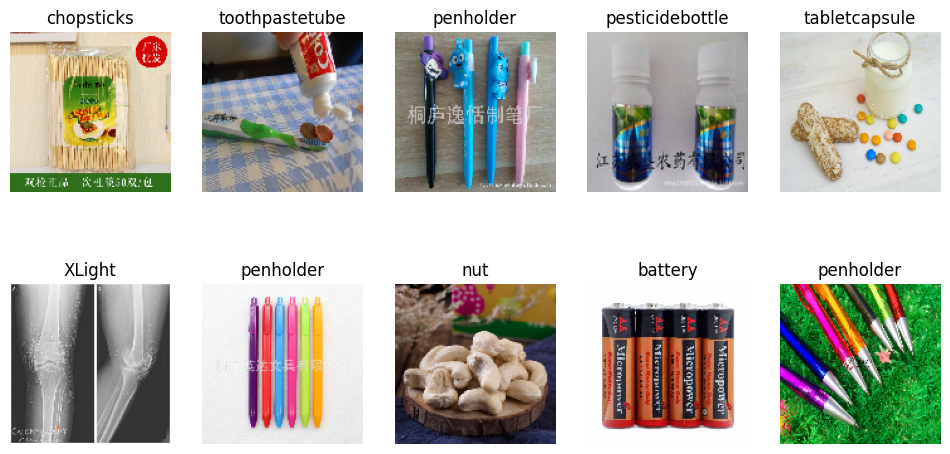

In [29]:
def plot_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Ambil gambar pertama dari batch
        plt.title(class_labels[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

plot_images(data_flow)

In [30]:
img_shape = data_flow.image_shape
print("Dimensi gambar yang digunakan:", img_shape)

Dimensi gambar yang digunakan: (128, 128, 3)


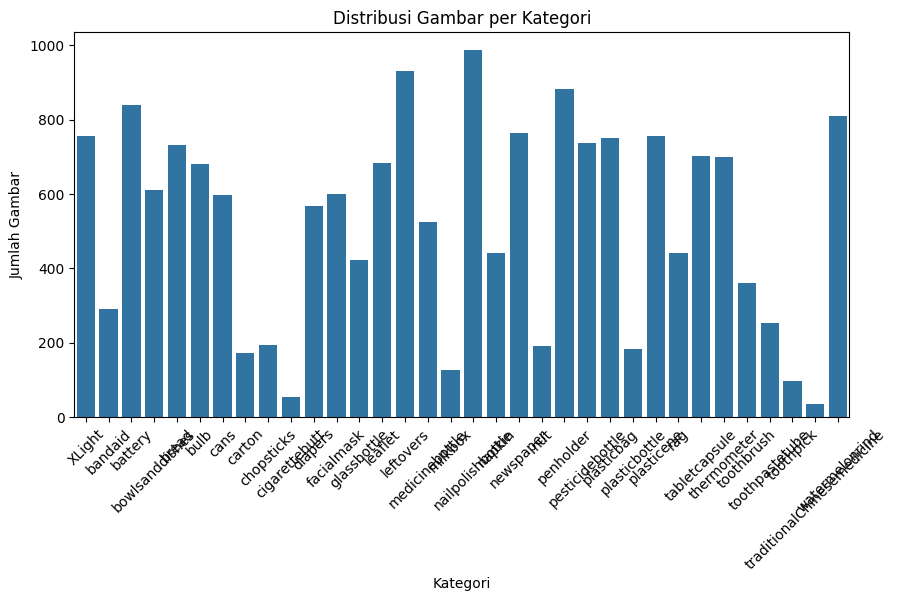

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Gambar per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.show()

# Preprocessing Data

## Image Data Generator

In [36]:
target_size = (128, 128)
batch_size = 32

# Generator untuk train dan validation set (20% dari data training untuk validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split 20% untuk validation
)

# Generator untuk test set (tanpa augmentasi, hanya normalisasi)
test_datagen = ImageDataGenerator(rescale=1./255)

## Load Dataset

In [37]:
# Flow untuk training data
train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Flow untuk validation data
val_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Flow untuk test data
test_flow = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Tidak diacak untuk evaluasi akhir
)

Found 14308 images belonging to 34 classes.
Found 3564 images belonging to 34 classes.
Found 5756 images belonging to 34 classes.


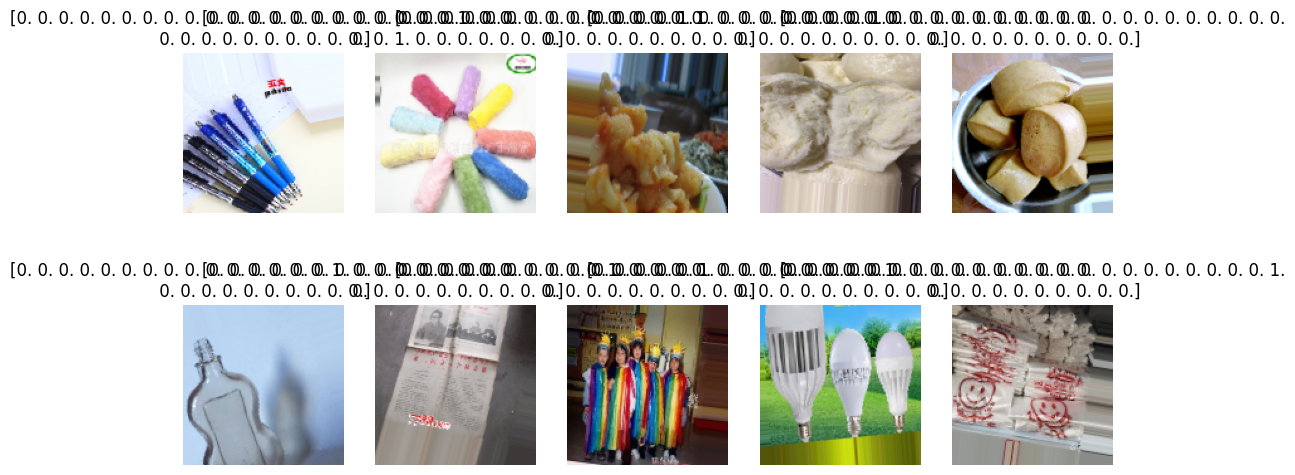

In [41]:
def plot_augmented_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Menampilkan gambar pertama dari batch
        plt.title(label[0])
        plt.axis("off")
    plt.show()

# Visualisasi beberapa gambar dari train_flow
plot_augmented_images(train_flow)